# WeatherPy
----

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_df = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Create your list for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for every_element in lat_lngs:
    city = citipy.nearest_city(every_element[0], every_element[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [3]:
len(lats)

1500

In [4]:
#lats
#lngs
lat_lngs

In [5]:
#cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#for i, city in enumerate(cities):
    #print(i, cities)

In [17]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
#?q=London,uk&appid=YOUR_API_KEY
city_data = []

print("Beginning Data Retrieval")
print("--------------------------")

record_count = 1
set_count =1

for i, city in enumerate(cities):
    if(i % 50 == 0 and i >=50):
        set_count  = set_count + 1
        record_count = 0 
        
    city_url= url + "&q="+city
    #print (city_url)
    print("Processing Record"+str(record_count) + "of Set" + str(set_count)+ "|" + city)
          
    
    try:
        city_weather = requests.get(city_url).json()
        city_latitude = city_weather['coord']['lat']
        city_long = city_weather['coord']['lon']
        city_tempMax = city_weather['main']['temp_max']
        city_wind = city_weather['wind']['speed']
        city_humidity = city_weather['main']['humidity']
        city_date = city_weather['dt']
        city_country = city_weather['sys']['country']
        city_cloudiness = city_weather['clouds']['all']
          
        city_data.append({"City": city,
                    "Cloudiness": city_cloudiness,
                      "Country": city_country,
                      "Date" : city_date  ,
                      "Humidity": city_humidity ,
                      "Lat": city_latitude,
                      "Longitude": city_long ,
                      "Max Temp": city_tempMax ,
                      "Wind Speed (mph)": city_wind}
                        )
    except:
        print("City not found. Skipping...")
        pass
                          
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")
          
    

Beginning Data Retrieval
--------------------------
Processing Record1of Set1|vaitupu
City not found. Skipping...
Processing Record1of Set1|butaritari
Processing Record1of Set1|ushuaia
Processing Record1of Set1|samusu
City not found. Skipping...
Processing Record1of Set1|nikolskoye
Processing Record1of Set1|barrow
Processing Record1of Set1|kidal
Processing Record1of Set1|fereydun kenar
Processing Record1of Set1|chokurdakh
Processing Record1of Set1|vila velha
Processing Record1of Set1|vila
Processing Record1of Set1|tibati
Processing Record1of Set1|albany
Processing Record1of Set1|pisco
Processing Record1of Set1|flin flon
Processing Record1of Set1|rikitea
Processing Record1of Set1|vaini
Processing Record1of Set1|kaitangata
Processing Record1of Set1|san miguel
Processing Record1of Set1|cabo san lucas
Processing Record1of Set1|punta arenas
Processing Record1of Set1|goundam
Processing Record1of Set1|faanui
Processing Record1of Set1|lebu
Processing Record1of Set1|asau
City not found. Skippin

Processing Record0of Set5|victoria
Processing Record0of Set5|yuanping
Processing Record0of Set5|cumra
Processing Record0of Set5|khorixas
Processing Record0of Set5|livani
Processing Record0of Set5|dagda
Processing Record0of Set5|san matias
Processing Record0of Set5|saint pete beach
Processing Record0of Set5|nam tha
City not found. Skipping...
Processing Record0of Set5|grand river south east
City not found. Skipping...
Processing Record0of Set5|ukiah
Processing Record0of Set5|karratha
Processing Record0of Set5|gat
Processing Record0of Set5|ozgon
City not found. Skipping...
Processing Record0of Set5|necochea
Processing Record0of Set5|doka
Processing Record0of Set5|khasan
Processing Record0of Set5|boda
Processing Record0of Set5|vuktyl
Processing Record0of Set5|kapaa
Processing Record0of Set5|aklavik
Processing Record0of Set5|usinsk
Processing Record0of Set5|razdolinsk
Processing Record0of Set5|lorengau
Processing Record0of Set5|walvis bay
Processing Record0of Set5|roma
Processing Record0of

Processing Record0of Set9|cherskiy
Processing Record0of Set9|kieta
Processing Record0of Set9|hami
Processing Record0of Set9|williston
Processing Record0of Set9|grand-lahou
Processing Record0of Set9|njombe
Processing Record0of Set9|saint-michel-des-saints
Processing Record0of Set9|nanchang
Processing Record0of Set9|saurimo
Processing Record0of Set9|lumphat
Processing Record0of Set9|erenhot
Processing Record0of Set9|lhuntshi
City not found. Skipping...
Processing Record0of Set9|chadiza
Processing Record0of Set9|ostrovnoy
Processing Record0of Set9|khandyga
Processing Record0of Set10|porosozero
Processing Record0of Set10|tilichiki
Processing Record0of Set10|deputatskiy
Processing Record0of Set10|bojnurd
Processing Record0of Set10|kahului
Processing Record0of Set10|karamea
City not found. Skipping...
Processing Record0of Set10|dukuhturi
Processing Record0of Set10|nouakchott
Processing Record0of Set10|harper
Processing Record0of Set10|tongliao
Processing Record0of Set10|meulaboh
Processing R

In [19]:
city_data_pd= pd.DataFrame(city_data)


City                567
Cloudiness          567
Country             567
Date                567
Humidity            567
Lat                 567
Longitude           567
Max Temp            567
Wind Speed (mph)    567
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
city_data_pd.count()

City                567
Cloudiness          567
Country             567
Date                567
Humidity            567
Lat                 567
Longitude           567
Max Temp            567
Wind Speed (mph)    567
dtype: int64

In [21]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Longitude,Max Temp,Wind Speed (mph)
0,butaritari,100,KI,1572662822,77,3.07,172.79,83.50,19.48
1,ushuaia,40,AR,1572662952,84,-54.81,-68.31,37.40,5.82
2,nikolskoye,90,RU,1572662904,86,59.70,30.79,30.99,4.47
3,barrow,100,AR,1572662952,96,-38.31,-60.23,62.13,10.18
4,kidal,12,ML,1572662953,26,18.44,1.41,77.31,4.83


In [29]:
city_data_pd.to_csv(output_df)

In [23]:
lats= city_data_pd['Lat']
temp= city_data_pd['Max Temp']

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

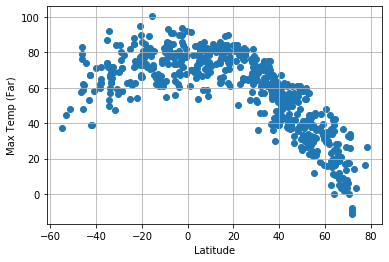

In [26]:
plt.scatter(lats, temp)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Far)")
plt.savefig("Fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot